# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/cars.csv"

In [3]:
df = pd.read_csv(DATASET_PATH)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [6]:
print(df.shape[0])
#df = df.drop_duplicates()
print(df.shape[0])

6999
6999


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


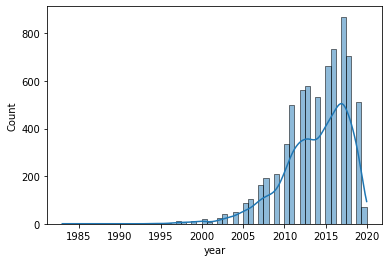

In [8]:
sns.histplot(df['year'], kde=True)
plt.show()

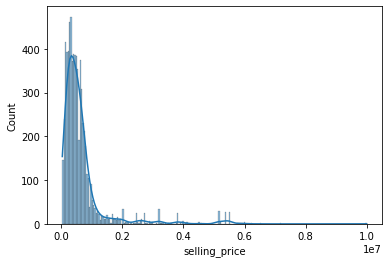

In [9]:
sns.histplot(df['selling_price'], kde=True)
plt.show()

In [10]:
df[(df['selling_price'] < 30000)].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4890,Maruti 800 AC,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [11]:
df[(df['selling_price'] > 6000000)].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
2532,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.0
4230,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4232,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0


In [12]:
#df = df[(df['selling_price'] < 6000000)]

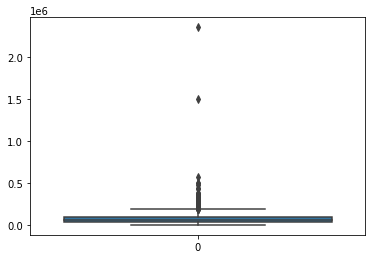

In [13]:
sns.boxplot(df['km_driven'])
plt.show()

In [14]:
df[(df['km_driven'] > 400000)].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1551,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3003,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
3023,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0
3137,Maruti Wagon R VXI BS IV,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4366,Mahindra Scorpio M2DI,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,2179 CC,115 bhp,277.5Nm@ 1700-2200rpm,5.0
4434,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,7.0
4681,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,950000,426000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
5735,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,200Nm@ 1400-3400rpm,7.0


In [15]:
df = df[(df['km_driven'] <= 1000000)]

In [16]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6997,6997,6997,6997,6997,6795,6795,6801,6794
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3792,5824,6093,4586,197,885,330,468


In [17]:
# df['name'].value_counts()
# df['name'].value_counts().index[0]
# df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

df = df.dropna()

In [18]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6794,6794,6794,6794,6794,6794,6794,6794,6794
unique,1852,4,3,2,5,386,120,314,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3695,5638,5898,4517,197,885,330,468


In [19]:
df['owner'].value_counts()

First Owner             4517
Second Owner            1710
Third Owner              433
Fourth & Above Owner     130
Test Drive Car             4
Name: owner, dtype: int64

In [20]:
df['owner'] = df['owner'].map({'First Owner' : 1, 'Second Owner' : 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 
                               'Test Drive Car': 0})

In [21]:
df['transmission'].value_counts()

Manual       5898
Automatic     896
Name: transmission, dtype: int64

In [22]:
df['transmission'] = df['transmission'].map({'Manual' : 1, 'Automatic' : 0})

In [23]:
df['seller_type'].value_counts()

Individual          5638
Dealer               950
Trustmark Dealer     206
Name: seller_type, dtype: int64

In [24]:
df['engine'].value_counts()

1248 CC    885
1197 CC    714
998 CC     393
796 CC     374
2179 CC    329
          ... 
1489 CC      1
1422 CC      1
1339 CC      1
2496 CC      1
1950 CC      1
Name: engine, Length: 120, dtype: int64

In [25]:
df['torque'].value_counts()

190Nm@ 2000rpm         468
200Nm@ 1750rpm         381
90Nm@ 3500rpm          350
113Nm@ 4200rpm         196
114Nm@ 4000rpm         151
                      ... 
250 Nm at 2750 rpm       1
170Nm@ 4200rpm           1
136.3Nm@ 4200rpm         1
11@ 3,000(kgm@ rpm)      1
250Nm@ 1250-5000rpm      1
Name: torque, Length: 419, dtype: int64

In [26]:
df.drop(['seller_type', 'engine', 'torque'], axis=1, inplace=True)

In [27]:
df['name'].value_counts()

Maruti Swift Dzire VDI                          116
Maruti Alto 800 LXI                              66
Maruti Alto LXi                                  61
BMW X4 M Sport X xDrive20d                       54
Maruti Swift VDI                                 51
                                               ... 
Nissan Micra Active XV                            1
Maruti Wagon R AX BSIV                            1
Renault Koleos 2.0 Diesel                         1
Hyundai Grand i10 Magna AT                        1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1852, dtype: int64

In [28]:
def firstWord(x: str):
    return x.split()[0]

In [29]:
df['name'] = df['name'].map(firstWord)

In [30]:
df['name'].value_counts()

Maruti           2048
Hyundai          1150
Mahindra          652
Tata              598
Honda             403
Toyota            394
Ford              330
Chevrolet         204
Renault           196
Volkswagen        166
BMW               101
Skoda              89
Nissan             70
Jaguar             61
Datsun             56
Volvo              55
Mercedes-Benz      49
Audi               38
Fiat               36
Lexus              30
Jeep               28
Mitsubishi         10
Land                6
Force               6
Isuzu               5
Kia                 4
MG                  3
Daewoo              3
Ambassador          3
Name: name, dtype: int64

In [31]:
df['fuel'].value_counts()

Diesel    3695
Petrol    3021
CNG         47
LPG         31
Name: fuel, dtype: int64

In [32]:
df.drop(['name', 'fuel'], axis=1, inplace=True)

In [33]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     23.0 kmpl
3     16.1 kmpl
4    20.14 kmpl
Name: mileage, dtype: object

In [34]:
def fieldSrt2float(x: str):
    return float(x.split()[0])

In [35]:
df['mileage'] = df['mileage'].map(fieldSrt2float)

In [36]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        90 bhp
3      88.2 bhp
4     81.86 bhp
Name: max_power, dtype: object

In [37]:
df['max_power'] = df['max_power'].map(fieldSrt2float)

In [38]:
# Вариант удаления полей про километраж и мощность авто
df.drop(['mileage'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6794 entries, 0 to 6998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6794 non-null   int64  
 1   selling_price  6794 non-null   int64  
 2   km_driven      6794 non-null   int64  
 3   transmission   6794 non-null   int64  
 4   owner          6794 non-null   int64  
 5   max_power      6794 non-null   float64
 6   seats          6794 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 424.6 KB


In [40]:
df.head()

,year,selling_price,km_driven,transmission,owner,max_power,seats
0,2014,450000,145500,1,1,74.00,5.0
1,2014,370000,120000,1,2,103.52,5.0
2,2010,225000,127000,1,1,90.00,5.0
3,2007,130000,120000,1,1,88.20,5.0
4,2017,440000,45000,1,1,81.86,5.0


<AxesSubplot:>

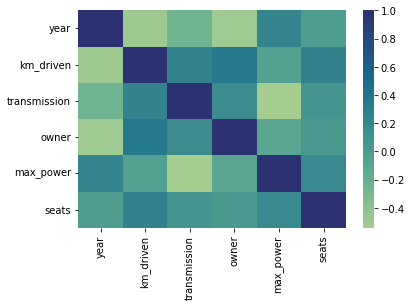

In [41]:
corr = df.drop(['selling_price'], axis=1).corr()
sns.heatmap(corr, cmap="crest")

In [42]:
#cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']

In [43]:
#X = df[['year', 'km_driven', 'seats', 
#        'name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']]

#X = df.drop(['selling_price'], axis=1)
#y = df['selling_price'] # целевая переменная (target)

In [44]:
#X = df[['year', 'km_driven', 'seats']]


In [45]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price'] # целевая переменная (target)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6794 entries, 0 to 6998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6794 non-null   int64  
 1   km_driven     6794 non-null   int64  
 2   transmission  6794 non-null   int64  
 3   owner         6794 non-null   int64  
 4   max_power     6794 non-null   float64
 5   seats         6794 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 371.5 KB


In [47]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((5095, 6), (1699, 6))

In [48]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,year,km_driven,transmission,owner,max_power,seats
0,0.653846,0.270169,1.0,0.25,0.286765,0.625
1,0.769231,0.133352,1.0,0.25,0.112200,0.375
2,0.269231,0.017317,1.0,0.25,0.074074,0.375
3,0.846154,0.133352,1.0,0.25,0.152315,0.375
4,0.692308,0.207822,1.0,0.75,0.206019,0.375


In [ ]:
from catboost import CatBoostRegressor

# model = CatBoostRegressor(iterations= 10000, random_seed= 42, learning_rate= 1e-3, verbose= False)

# model без дубляжа километража
model = CatBoostRegressor(iterations= 10000, depth=10,learning_rate= 0.003, 
                          loss_function= 'RMSE',  random_seed= 42, verbose= False)

model.fit(X_train, y_train) 

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

In [ ]:
scores.mean()

In [ ]:
print(cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean())

In [ ]:
pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, pred, squared=False)

In [ ]:
r2_score(y_test, pred)

In [ ]:
import pickle

with open('model_avto.pickle', 'wb') as f:
    pickle.dump(model, f)

# а так модель можно загрузить из файла:
# with open('model_avto.pickle', 'rb') as f:
#     model = pickle.load(f)

In [ ]:
код для поиска лучшей модели (выполнять пока не нужно)

In [ ]:
model2 = CatBoostRegressor(random_seed=42, verbose=False)

params = {"iterations": [10000],
          "depth": [8, 10, 12],
          "loss_function": ["RMSE"],
          "learning_rate": [0.001, 0.002, 0.003]}


clf = GridSearchCV(estimator=model2, param_grid=params, cv=3, scoring="r2",)
clf.fit(X_train, y_train)

In [ ]:
clf.best_estimator_.get_params()

In [ ]:
#model3= clf.best_estimator_
pred = clf.best_estimator_.predict(X_test)
r2_score(y_test, pred)

In [ ]:
mean_squared_error(y_test, pred, squared=False)

LabelEncoder - каждому уникальному значению признака присваивается своё число.

CountEncoder - каждому уникальному значению признака присваивается число, равное количеству раз, которое признак встречается в выборке.